# Features

In [1]:
''''baseline value
accelerations
fetal_movement
uterine_contractions
light_decelerations
severe_decelerations
prolongued_decelerations
abnormal_short_term_variability
mean_value_of_short_term_variability
percentage_of_time_with_abnormal_long_term_variability
mean_value_of_long_term_variability
histogram_width
histogram_min
histogram_max
histogram_number_of_peaks
histogram_number_of_zeroes
histogram_mode
histogram_mean
histogram_median
histogram_variance
histogram_tendency
fetal_health'''

"'baseline value\naccelerations\nfetal_movement\nuterine_contractions\nlight_decelerations\nsevere_decelerations\nprolongued_decelerations\nabnormal_short_term_variability\nmean_value_of_short_term_variability\npercentage_of_time_with_abnormal_long_term_variability\nmean_value_of_long_term_variability\nhistogram_width\nhistogram_min\nhistogram_max\nhistogram_number_of_peaks\nhistogram_number_of_zeroes\nhistogram_mode\nhistogram_mean\nhistogram_median\nhistogram_variance\nhistogram_tendency\nfetal_health"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix as CM

In [3]:
df = pd.read_csv(r'D:\TCS\DebosmitMentor\INTERNSHIP\featel.csv')


In [4]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [5]:
df.shape

(2126, 22)

# Description

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [8]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [9]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [10]:
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [11]:
df['fetal_health'].unique()

array([2., 1., 3.])

# Variable type

In [12]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

# Checking for missing values

In [13]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# Histogram for all features before outlier treatment

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


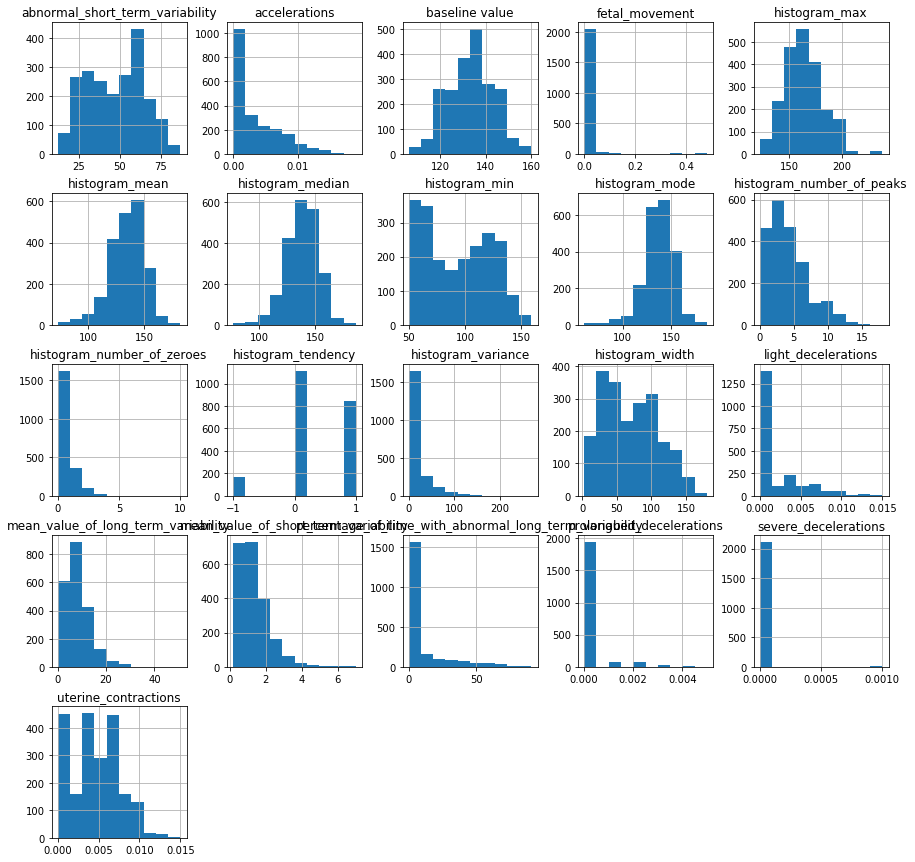

In [14]:
df_X = df.drop(columns=['fetal_health'])
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
df_X.hist(ax=ax)
plt.show()

# correlation matrix

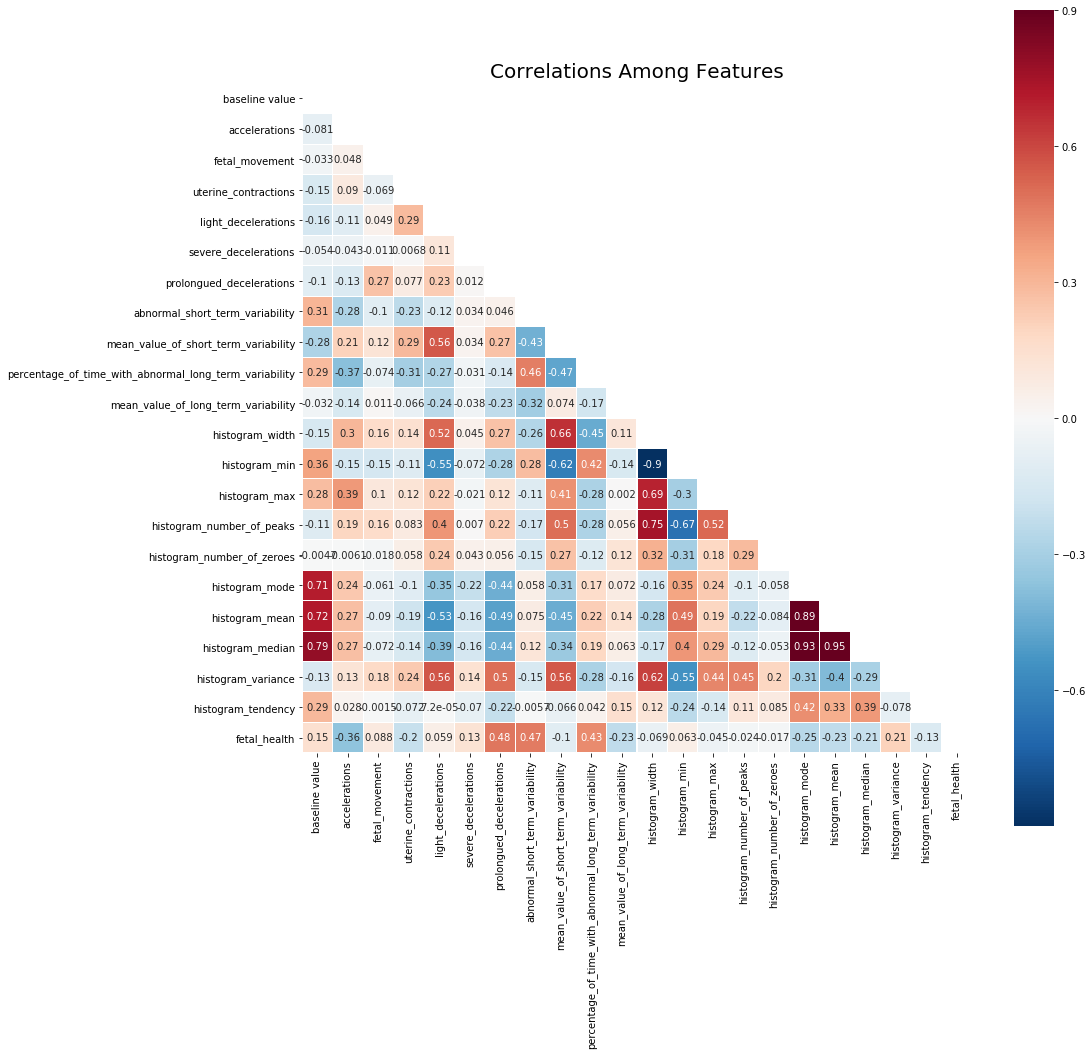

In [15]:
feat = np.zeros_like(df.corr(), dtype=np.bool)
feat[np.triu_indices_from(feat)] = True

plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), 
            annot=True,
            mask = feat,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

Dropping the features that are highly correlated

In [16]:
df.drop(labels='histogram_mean', axis=1, inplace=True)
df.drop(labels='histogram_mode', axis=1, inplace=True)
df.drop(labels='histogram_width', axis=1, inplace=True)
df.drop(labels='histogram_median', axis=1, inplace=True)

In [17]:
#histogram mean,histogram mode,histogram width,histogram median

# OUTLIER TREAMENT

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range:")
print(IQR)

Inter Quartile Range:
baseline value                                            14.000
accelerations                                              0.006
fetal_movement                                             0.003
uterine_contractions                                       0.005
light_decelerations                                        0.003
severe_decelerations                                       0.000
prolongued_decelerations                                   0.000
abnormal_short_term_variability                           29.000
mean_value_of_short_term_variability                       1.000
percentage_of_time_with_abnormal_long_term_variability    11.000
mean_value_of_long_term_variability                        6.200
histogram_min                                             53.000
histogram_max                                             22.000
histogram_number_of_peaks                                  4.000
histogram_number_of_zeroes                                 0.000
his

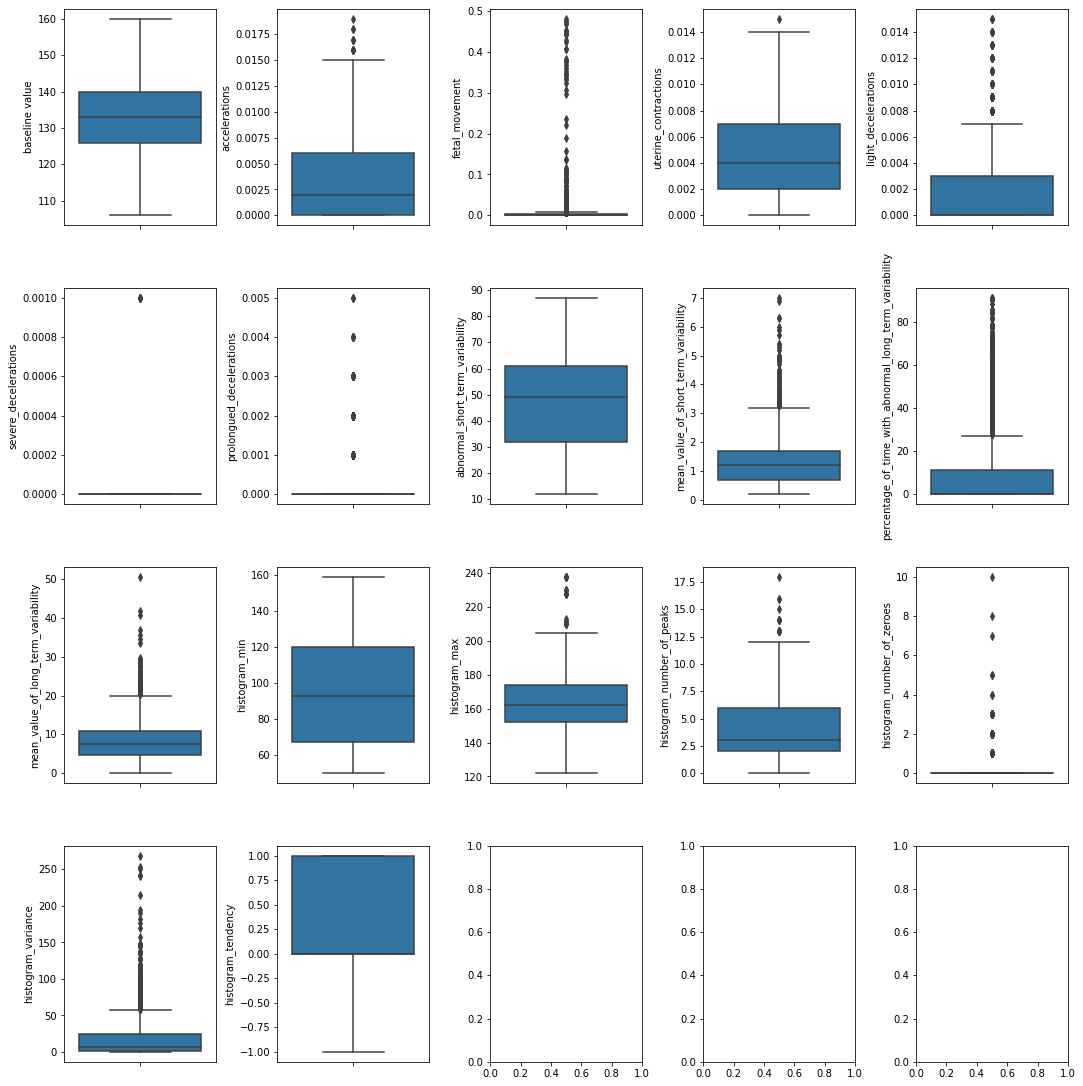

In [19]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15, 15))
ax = ax.flatten()
index = 0
for i in df.columns:
    if i != 'fetal_health':
        sns.boxplot(y=i, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [20]:
def outlierTreatment(dt,field_name):
    q1 = np.quantile(df[field_name],0.25)
    q3 = np.quantile(df[field_name],0.75)
    iqr = q3 - q1
    l=df[field_name].quantile(0.50)
    df[field_name] = np.where(df[field_name] > q3 + (1.5 * iqr), l , df[field_name])
    df[field_name] = np.where(df[field_name] < q1 - (1.5 * iqr), l , df[field_name])
    sns.boxplot(df[field_name])

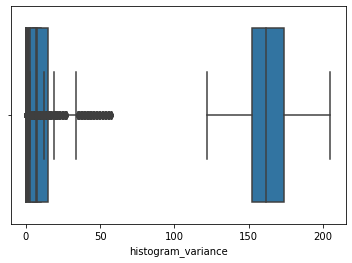

In [21]:
outlierTreatment(df,"accelerations")
outlierTreatment(df,"fetal_movement")
outlierTreatment(df,"uterine_contractions")
outlierTreatment(df,"light_decelerations")
outlierTreatment(df,"severe_decelerations")
outlierTreatment(df,"prolongued_decelerations")
outlierTreatment(df,"mean_value_of_short_term_variability")
outlierTreatment(df,"percentage_of_time_with_abnormal_long_term_variability")
outlierTreatment(df,"mean_value_of_long_term_variability")
outlierTreatment(df,"histogram_max")
outlierTreatment(df,"histogram_number_of_peaks")
outlierTreatment(df,"histogram_number_of_zeroes")
outlierTreatment(df,"histogram_variance")

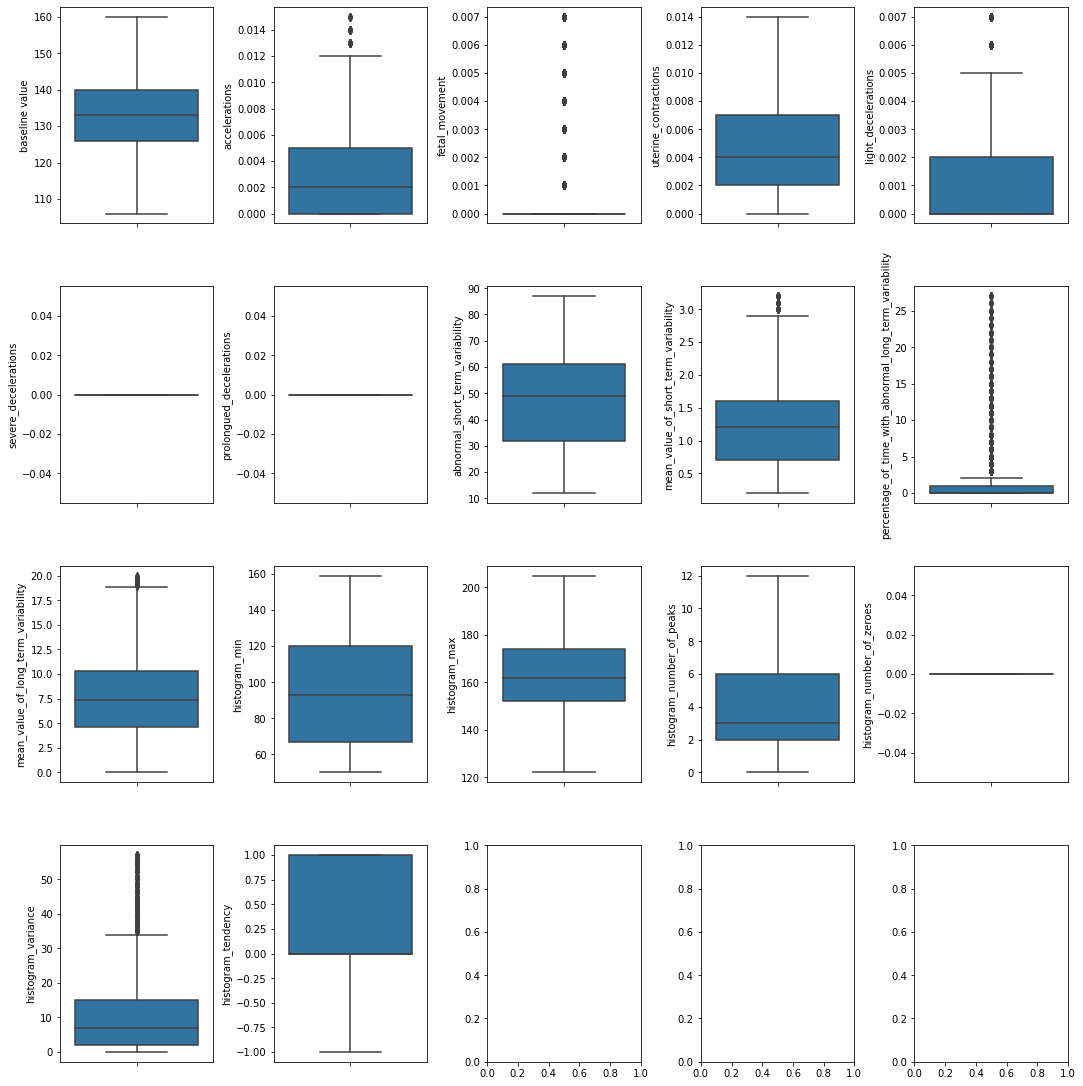

In [22]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15, 15))
ax = ax.flatten()
index = 0
for i in df.columns:
    if i != 'fetal_health':
        sns.boxplot(y=i, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.4)
plt.show()

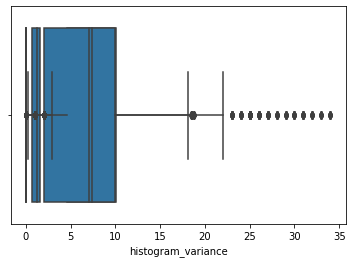

In [23]:
outlierTreatment(df,"accelerations")
outlierTreatment(df,"fetal_movement")
outlierTreatment(df,"light_decelerations")
outlierTreatment(df,"mean_value_of_short_term_variability")
outlierTreatment(df,"percentage_of_time_with_abnormal_long_term_variability")
outlierTreatment(df,"mean_value_of_long_term_variability")
outlierTreatment(df,"histogram_variance")

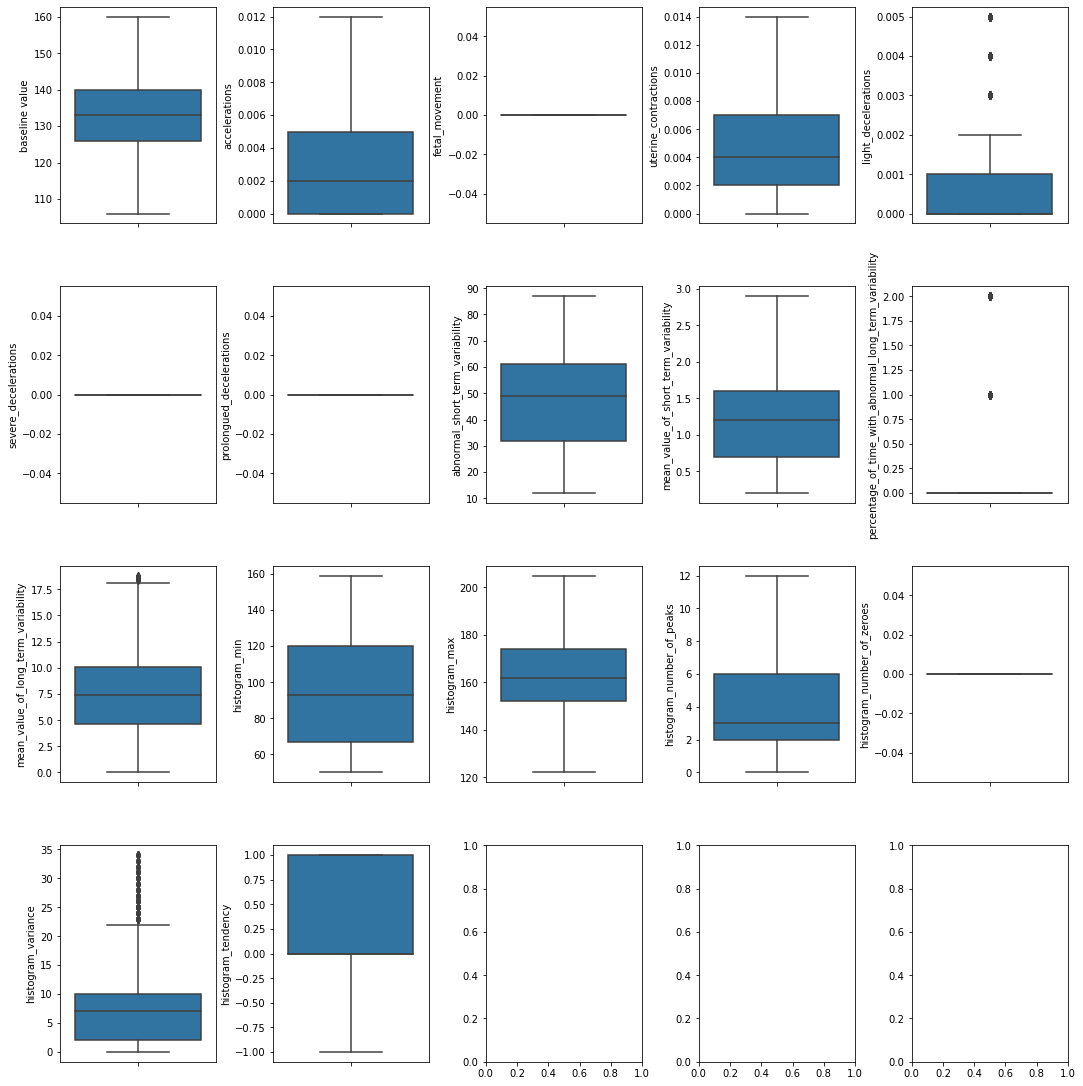

In [24]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15, 15))
ax = ax.flatten()
index = 0
for i in df.columns:
    if i != 'fetal_health':
        sns.boxplot(y=i, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.4)
plt.show()

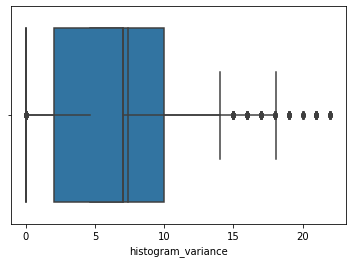

In [25]:
outlierTreatment(df,"light_decelerations")
outlierTreatment(df,"percentage_of_time_with_abnormal_long_term_variability")
outlierTreatment(df,"mean_value_of_long_term_variability")
outlierTreatment(df,"histogram_variance")

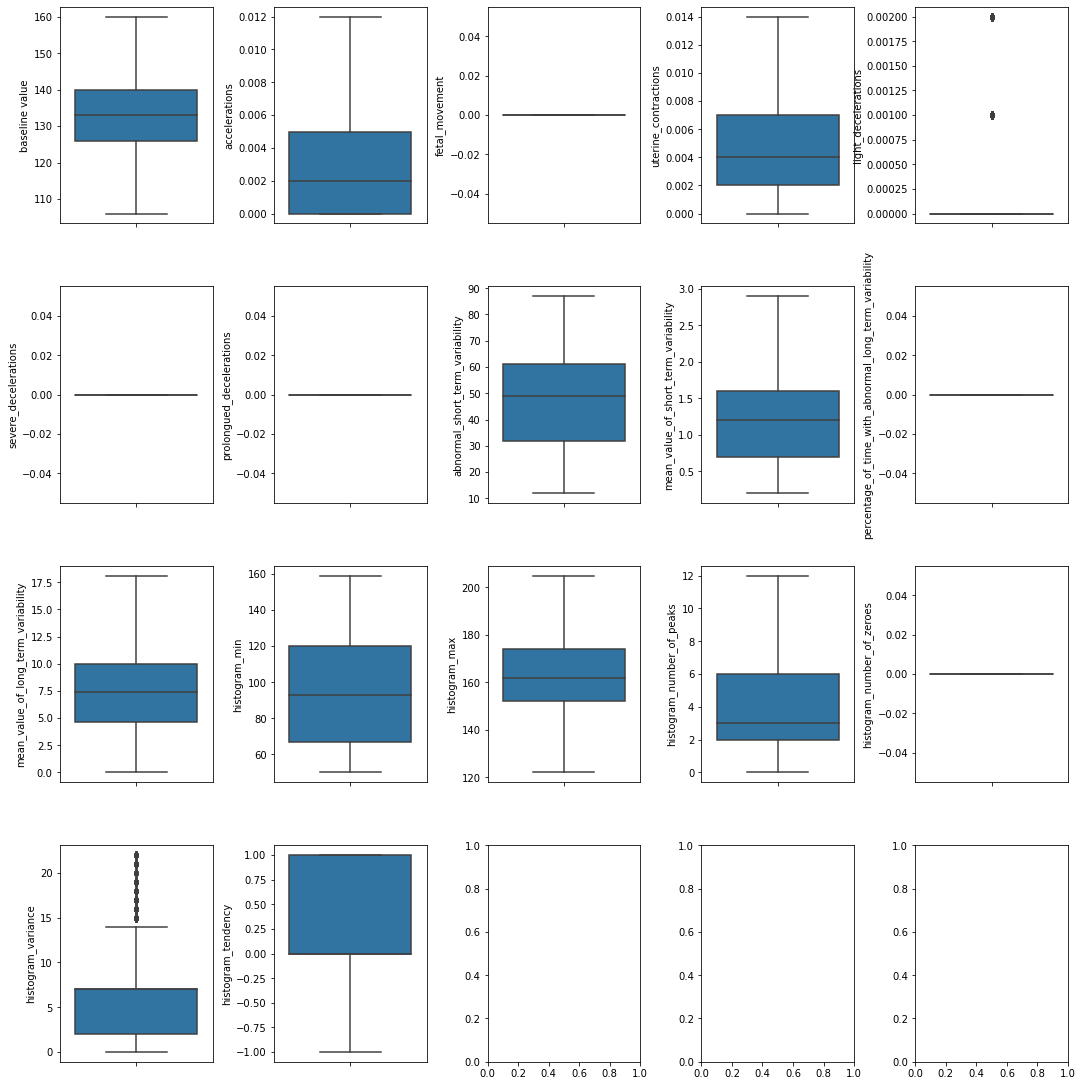

In [26]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15, 15))
ax = ax.flatten()
index = 0
for i in df.columns:
    if i != 'fetal_health':
        sns.boxplot(y=i, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.4)
plt.show()

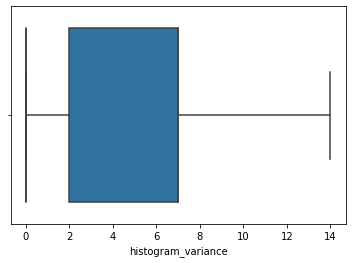

In [27]:
outlierTreatment(df,"light_decelerations")
outlierTreatment(df,"histogram_variance")

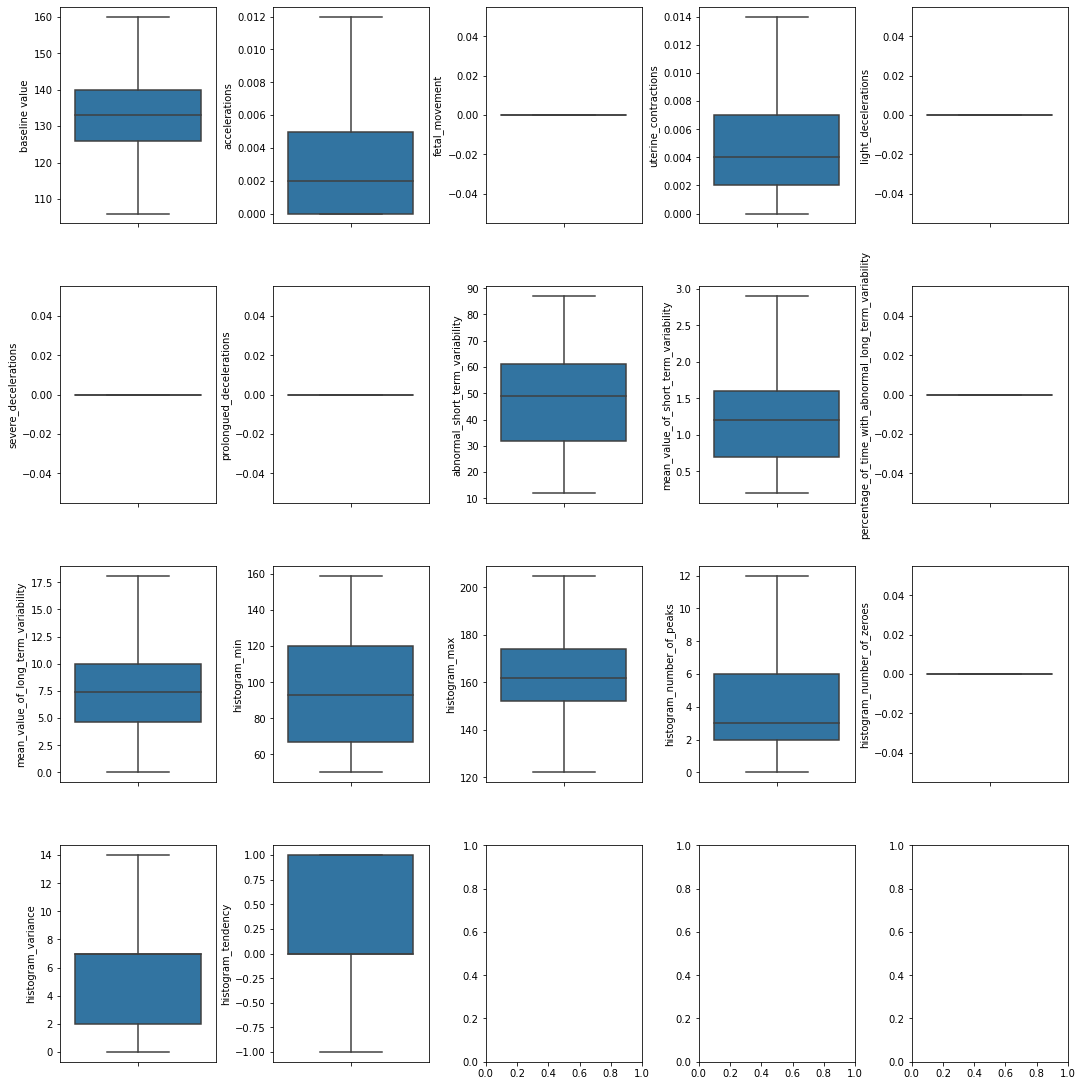

In [28]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15, 15))
ax = ax.flatten()
index = 0
for i in df.columns:
    if i != 'fetal_health':
        sns.boxplot(y=i, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [29]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
seed=5
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=seed)


from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
print(classification_report(y_test, preds))
score={}
conf_matrix = confusion_matrix(y_test, preds)
acc_xg = accuracy_score(y_test, preds)
print(conf_matrix)
acc_xg

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.97       508
         2.0       0.81      0.78      0.80        85
         3.0       0.80      0.73      0.77        45

    accuracy                           0.93       638
   macro avg       0.86      0.83      0.84       638
weighted avg       0.93      0.93      0.93       638

[[495  10   3]
 [ 14  66   5]
 [  7   5  33]]


0.9310344827586207

# Frequency Counts of Column

In [30]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

# BAR CHART

Text(0.5, 1.0, 'Fetal health comparison')

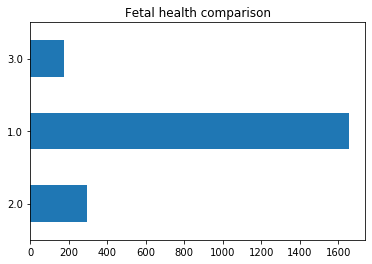

In [31]:
(df['fetal_health']
 .value_counts(sort=False)
 .plot.barh()
 .set_title('Fetal health comparison')
)

# HISTOGRAM

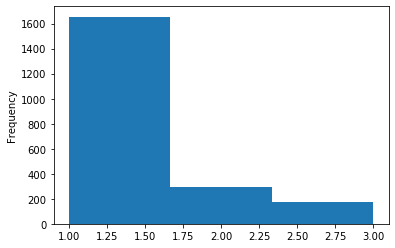

In [32]:
(df['fetal_health']
 .plot
 .hist(bins=3))

# Stacked Bar Chart

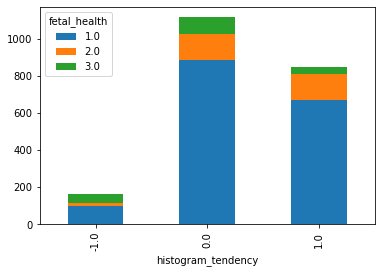

In [33]:
df.groupby(['histogram_tendency', 'fetal_health']).size().unstack().plot.bar(stacked=True)

# Dodged Bar Chart

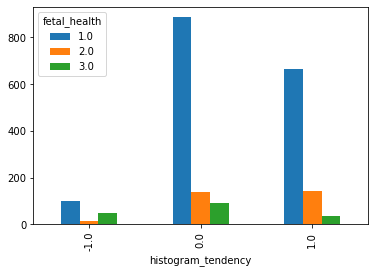

In [34]:
(df
 .groupby(['histogram_tendency', 'fetal_health'])
 .size()
 .unstack()
 .plot.bar()
)

# Histogram for all features after outlier treatment

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


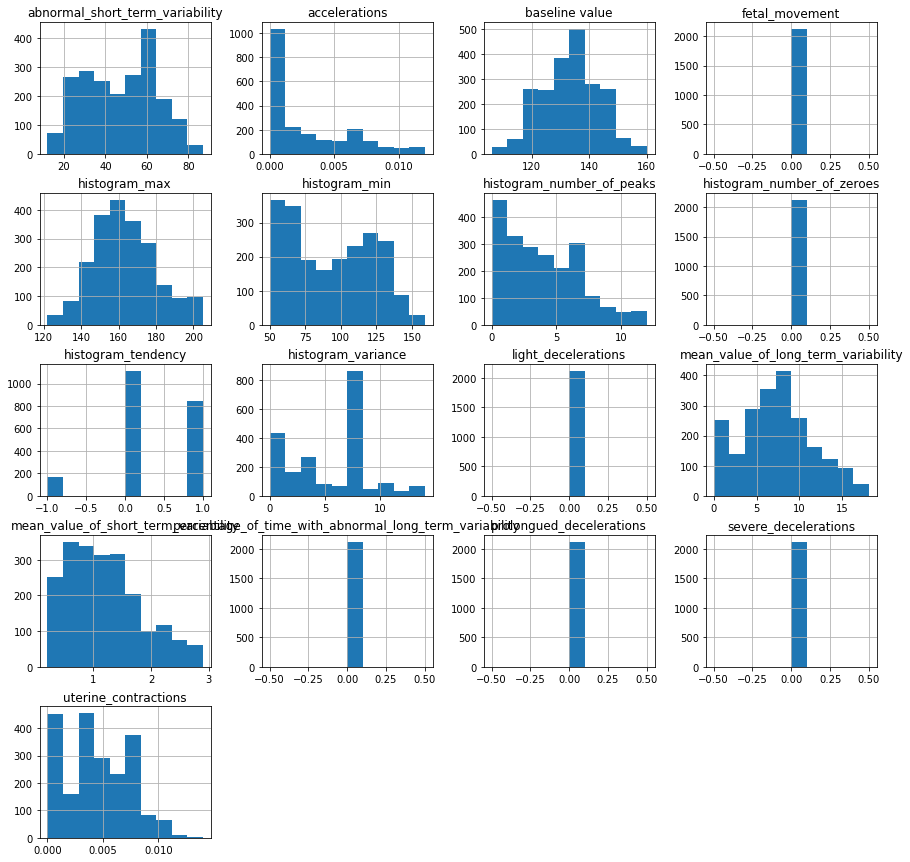

In [35]:
df_X = df.drop(columns=['fetal_health'])
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
df_X.hist(ax=ax)
plt.show()

# PIE CHART

In [36]:
x = df['fetal_health'].value_counts()
x

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

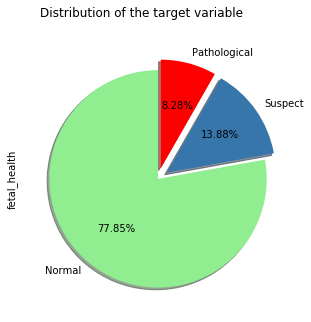

In [37]:
plt.figure(figsize=(18,5))
df['fetal_health'].value_counts().plot(kind='pie', autopct='%.2f%%',shadow=True, explode=[0,0.1,0.1], 
                                       startangle=90, colors=['#90EE90','#3776ab','red'],
                                      labels = ['Normal','Suspect','Pathological'])
plt.suptitle('Distribution of the target variable')
plt.show()

In [38]:
df.nunique()

baseline value                                             48
accelerations                                              13
fetal_movement                                              1
uterine_contractions                                       15
light_decelerations                                         1
severe_decelerations                                        1
prolongued_decelerations                                    1
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       28
percentage_of_time_with_abnormal_long_term_variability      1
mean_value_of_long_term_variability                       181
histogram_min                                             109
histogram_max                                              80
histogram_number_of_peaks                                  13
histogram_number_of_zeroes                                  1
histogram_variance                                         15
histogra

# SKEWNESS

In [39]:
df.skew(axis = 0, skipna = True)

baseline value                                            0.020312
accelerations                                             1.008002
fetal_movement                                            0.000000
uterine_contractions                                      0.143725
light_decelerations                                       0.000000
severe_decelerations                                      0.000000
prolongued_decelerations                                  0.000000
abnormal_short_term_variability                          -0.011829
mean_value_of_short_term_variability                      0.589327
percentage_of_time_with_abnormal_long_term_variability    0.000000
mean_value_of_long_term_variability                       0.196658
histogram_min                                             0.115784
histogram_max                                             0.272001
histogram_number_of_peaks                                 0.734832
histogram_number_of_zeroes                                0.00

# Normalization

In [40]:
x_data = df.drop(['fetal_health'],axis=1)
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [41]:
x_data.skew(axis = 0, skipna = True)

baseline value                                            0.020312
accelerations                                             1.008002
fetal_movement                                            0.000000
uterine_contractions                                      0.143725
light_decelerations                                       0.000000
severe_decelerations                                      0.000000
prolongued_decelerations                                  0.000000
abnormal_short_term_variability                          -0.011829
mean_value_of_short_term_variability                      0.589327
percentage_of_time_with_abnormal_long_term_variability    0.000000
mean_value_of_long_term_variability                       0.196658
histogram_min                                             0.115784
histogram_max                                             0.272001
histogram_number_of_peaks                                 0.734832
histogram_number_of_zeroes                                0.00

# ClassImbalance

In [42]:
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Separating the independent variables from dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
seed=15

#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=seed)

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_SMOTE, y_train_SMOTE)
preds = xgb.predict(X_test)
print(classification_report(y_test, preds))
score={}
conf_matrix = confusion_matrix(y_test, preds)
acc_xg = accuracy_score(y_test, preds)
print(conf_matrix)
acc_xg

Before oversampling:  Counter({1.0: 1163, 2.0: 196, 3.0: 129})
After oversampling:  Counter({1.0: 1163, 2.0: 1163, 3.0: 1163})
[21:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       492
         2.0       0.87      0.72      0.78        99
         3.0       0.79      0.87      0.83        47

    accuracy                           0.93       638
   macro avg       0.87      0.86      0.86       638
weighted avg       0.93      0.93      0.93       638

[[484   6   2]
 [ 19  71   9]
 [  1   5  41]]


0.9341692789968652

In [43]:

# import random undersampling and other necessary libraries 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Separating the independent variables from dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
seed=15
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=seed)

# summarize class distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_under, y_train_under)
preds = xgb.predict(X_test)
print(classification_report(y_test, preds))
score={}
conf_matrix = confusion_matrix(y_test, preds)
acc_xg = accuracy_score(y_test, preds)
print(conf_matrix)
acc_xg

Before undersampling:  Counter({1.0: 1163, 2.0: 196, 3.0: 129})
After undersampling:  Counter({2.0: 196, 1.0: 129, 3.0: 129})
[21:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

         1.0       0.98      0.81      0.89       492
         2.0       0.59      0.90      0.71        99
         3.0       0.51      0.87      0.64        47

    accuracy                           0.83       638
   macro avg       0.69      0.86      0.75       638
weighted avg       0.89      0.83      0.84       638

[[398  58  36]
 [  6  89   4]
 [  1   5  41]]


0.8275862068965517

# MACHINE LEARNING ALGORITHM

# DECISION TREE

---------------------------------------------------------
		Confusion matrix
---------------------------------------------------------


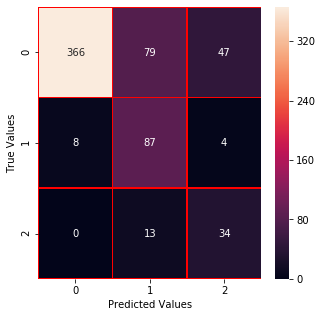

---------------------------------------------------------
		Classification report
---------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.98      0.74      0.85       492
         2.0       0.49      0.88      0.63        99
         3.0       0.40      0.72      0.52        47

    accuracy                           0.76       638
   macro avg       0.62      0.78      0.66       638
weighted avg       0.86      0.76      0.79       638

Decision Tree Classification Score:  76.33 %


In [44]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
dec_tree = DecisionTreeClassifier(random_state=42,max_depth=5)
dec_tree.fit(X_train_SMOTE,y_train_SMOTE)
print("---------------------------------------------------------")
print("\t\tConfusion matrix")
print("---------------------------------------------------------")
y_pred = dec_tree.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
print("---------------------------------------------------------")
print("\t\tClassification report")
print("---------------------------------------------------------")
print(classification_report(y_test,y_pred))
print("Decision Tree Classification Score: ",round(dec_tree.score(X_test,y_test)*100,2),"%")



# RANDOM FOREST

      Actual  Predicted
2106     1.0        1.0
2098     1.0        1.0
1776     3.0        3.0
1161     1.0        1.0
898      1.0        1.0
---------------------------------------
Classification report
---------------------------------------
              precision    recall  f1-score   support

         1.0      0.962     0.984     0.973       492
         2.0      0.871     0.747     0.804        99
         3.0      0.840     0.894     0.866        47

    accuracy                          0.940       638
   macro avg      0.891     0.875     0.881       638
weighted avg      0.939     0.940     0.939       638

----------------
Accuracy
----------------
94.04388714733543 %
---------------------------------------
Confussion matrix:
---------------------------------------
Random forest Classification Score:  94.04 %


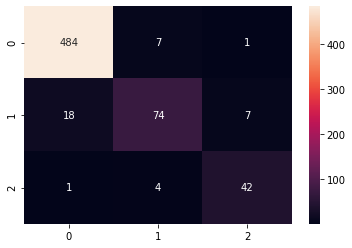

In [45]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(n_estimators=25, criterion='gini', random_state=42,)
rfc.fit(X_train_SMOTE,y_train_SMOTE)
Y_pred_rfc = rfc.predict(X_test)
Y_compare_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : Y_pred_rfc})
print(Y_compare_rfc.head())
print("---------------------------------------")
print('Classification report')
print("---------------------------------------")
print(classification_report(y_test, Y_pred_rfc, digits=3))
print("----------------")
print("Accuracy")
print("----------------")
print(accuracy_score(y_test,Y_pred_rfc)*100,'%')
print("---------------------------------------")
print('Confussion matrix:')
print("---------------------------------------")
cm = CM(y_test, Y_pred_rfc)
sns.heatmap(cm,annot=True,fmt="d")
print("Random forest Classification Score: ",round(rfc.score(X_test,y_test)*100,2),"%")


# LOGISTIC REGRESSION

      Actual  Predicted
2106     1.0        2.0
2098     1.0        3.0
1776     3.0        3.0
1161     1.0        1.0
898      1.0        1.0
---------------------------------------
Classification report
---------------------------------------
              precision    recall  f1-score   support

         1.0      0.929     0.667     0.776       492
         2.0      0.401     0.697     0.509        99
         3.0      0.301     0.723     0.425        47

    accuracy                          0.676       638
   macro avg      0.544     0.696     0.570       638
weighted avg      0.801     0.676     0.709       638

----------------
Accuracy
----------------
67.55485893416929 %
---------------------------------------
Confussion matrix:
---------------------------------------


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


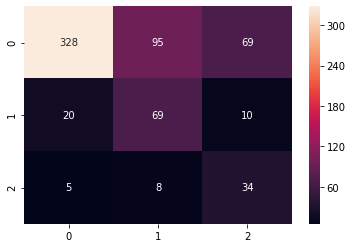

In [46]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
lm = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')
lm.fit(X_train_SMOTE, y_train_SMOTE)
Y_pred_lm = lm.predict(X_test)
Y_compare_lm = pd.DataFrame({'Actual' : y_test, 'Predicted' : Y_pred_lm})
print(Y_compare_lm.head())
print("---------------------------------------")
print('Classification report')
print("---------------------------------------")
print(classification_report(y_test, Y_pred_lm, digits=3))
print("----------------")
print("Accuracy")
print("----------------")
print(accuracy_score(y_test,Y_pred_lm)*100,'%')
print("---------------------------------------")
print('Confussion matrix:')
print("---------------------------------------")
cm = CM(y_test, Y_pred_lm)
sns.heatmap(cm,annot=True,fmt="d")

# KNN

      Actual  Predicted
2106     1.0        2.0
2098     1.0        2.0
1776     3.0        3.0
1161     1.0        1.0
898      1.0        1.0
---------------------------------------
Classification report
---------------------------------------
              precision    recall  f1-score   support

         1.0      0.979     0.770     0.862       492
         2.0      0.583     0.778     0.667        99
         3.0      0.319     0.809     0.458        47

    accuracy                          0.774       638
   macro avg      0.627     0.786     0.662       638
weighted avg      0.869     0.774     0.802       638

----------------
Accuracy
----------------
77.4294670846395 %
---------------------------------------
Confussion matrix:
---------------------------------------


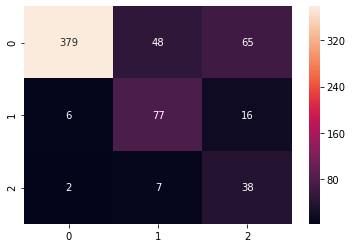

In [47]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=46, p=1, weights='distance')
knn.fit(X_train_SMOTE,y_train_SMOTE)
Y_pred_knn = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual' : y_test, 'Predicted' : Y_pred_knn})
print(Y_compare_knn.head())
print("---------------------------------------")
print('Classification report')
print("---------------------------------------")
print(classification_report(y_test, Y_pred_knn, digits=3))
print("----------------")
print("Accuracy")
print("----------------")
print(accuracy_score(y_test,Y_pred_knn)*100,'%')
print("---------------------------------------")
print('Confussion matrix:')
print("---------------------------------------")
cm = CM(y_test, Y_pred_knn)
sns.heatmap(cm,annot=True,fmt="d")

# NAIVE BAYES

---------------------------------------------------------
Classification report
---------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.96      0.74      0.84       492
         2.0       0.49      0.86      0.63        99
         3.0       0.28      0.51      0.36        47

    accuracy                           0.74       638
   macro avg       0.58      0.70      0.61       638
weighted avg       0.84      0.74      0.77       638

----------------
Accuracy
----------------
74.29467084639498 %
---------------------------------------------------------
		Confusion matrix
---------------------------------------------------------


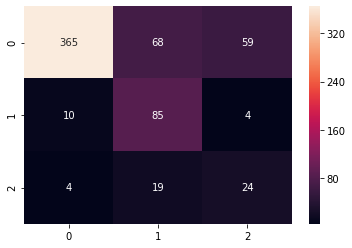

In [48]:

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train_SMOTE,y_train_SMOTE)
y_pred = NB.predict(X_test)
print("---------------------------------------------------------")
print("Classification report")
print("---------------------------------------------------------")
print(classification_report(y_test,y_pred))
print("----------------")
print("Accuracy")
print("----------------")
print(accuracy_score(y_test, y_pred)*100,'%')
print("---------------------------------------------------------")
print("\t\tConfusion matrix")
print("---------------------------------------------------------")
y_pred = NB.predict(X_test)
cm = CM(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

# Xgboost

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
      Actual  Predicted
2106     1.0        1.0
2098     1.0        1.0
1776     3.0        3.0
1161     1.0        1.0
898      1.0        1.0
Classification report:
F1 score:
               precision    recall  f1-score   support

         1.0      0.960     0.984     0.972       492
         2.0      0.866     0.717     0.785        99
         3.0      0.788     0.872     0.828        47

    accuracy                          0.934       638
   macro avg      0.872     0.858     0.862       638
weighted avg      0.933     0.934     0.932       638


Confussion matrix:
Accuracy
----------------
93.41692789968651 %


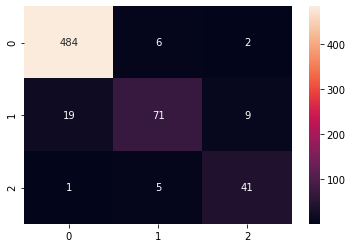

In [49]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train_SMOTE,y_train_SMOTE)
xgb_pred = xgb.predict(X_test)
Y_compare_dt = pd.DataFrame({'Actual' : y_test, 'Predicted' : xgb_pred})
print(Y_compare_dt.head())
print('Classification report:')
print('F1 score:\n',classification_report(y_test, xgb_pred, digits=3))
print('\nConfussion matrix:')
cm = CM(y_test, xgb_pred)
sns.heatmap(cm,annot=True,fmt="d")


print("Accuracy")
print("----------------")
print(accuracy_score(y_test, xgb_pred)*100,'%')

In [50]:
warnings. filterwarnings("ignore")

In [51]:
#K-fold cross validation
modelNames = [ 'xgboost','DecisionTreeClassifier','K-Nearest Neighbour', 'Naive Bayes', 'Random Forrest','LogisticRegression']
modelClassifiers = [ xgb,dec_tree,knn, NB, rfc,lm]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter=0
score=[]
for i in models['modelClassifiers']:
    accuracy = cross_val_score(i, X_train_SMOTE, y_train_SMOTE, scoring='accuracy', cv=10)
    print('Accuracy of %s Classification model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
    score.append(accuracy.mean())
    counter+=1

[21:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:20:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

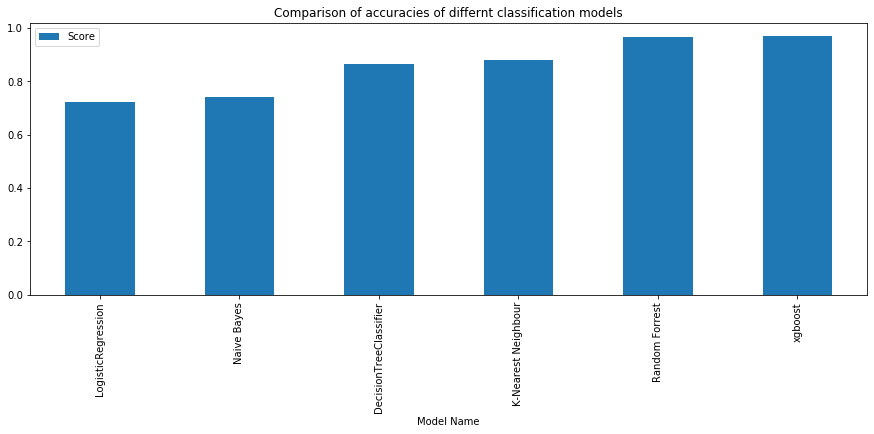

In [52]:
pd.DataFrame({'Model Name' : modelNames ,'Score' : score}).sort_values(by ='Score', ascending = True).plot( x=0, y=1, kind='bar',     figsize=(15,5)
                , title='Comparison of accuracies of differnt classification models')
plt.show()

k-Nearest Neighbors,Decision Trees,Naive Bayes,Random Forest,Gradient Boosting.

In [43]:
df.drop(labels='accelerations', axis=1, inplace=True)
df.drop(labels='light_decelerations', axis=1, inplace=True)
df.drop(labels='mean_value_of_short_term_variability', axis=1, inplace=True)
df.drop(labels='mean_value_of_long_term_variability', axis=1, inplace=True)
df.drop(labels='histogram_max', axis=1, inplace=True)
df.drop(labels='histogram_number_of_peaks', axis=1, inplace=True)
df.drop(labels='histogram_number_of_zeroes', axis=1, inplace=True)
df.drop(labels='histogram_tendency', axis=1, inplace=True)

In [44]:
df.head()

,baseline value,fetal_movement,uterine_contractions,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_min,histogram_variance,fetal_health
0,120.0,0.0,0.000,0.0,0.0,73.0,0.0,62.0,7.0,2.0
1,132.0,0.0,0.006,0.0,0.0,17.0,0.0,68.0,12.0,1.0
2,133.0,0.0,0.008,0.0,0.0,16.0,0.0,68.0,13.0,1.0
3,134.0,0.0,0.008,0.0,0.0,16.0,0.0,53.0,13.0,1.0
4,132.0,0.0,0.008,0.0,0.0,16.0,0.0,53.0,11.0,1.0


In [45]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 100, multi_class = 'auto', solver = 'lbfgs')
classifier2.fit(X_train_SMOTE, y_train_SMOTE)
#predicting the values
y_pred = classifier2.predict(X_test)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_Log = confusion_matrix(y_test, y_pred)
#Accuracy and report of the classifier
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,y_pred)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.670846394984326

In [50]:
#KNNeighbours
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 46,  p =1,weights='distance')
classifier.fit(X_train_SMOTE, y_train_SMOTE)
#predicting the values
y_pred = classifier.predict(X_test)
#confusion matrix
cm_KNN = confusion_matrix(y_test, y_pred)
print(cm_KNN)
#Accuracy
accuracy_score(y_test,y_pred)
report_KNN=classification_report(y_test,y_pred)
print(report_KNN)

[[385  45  62]
 [  7  75  17]
 [  1   7  39]]
              precision    recall  f1-score   support

         1.0       0.98      0.78      0.87       492
         2.0       0.59      0.76      0.66        99
         3.0       0.33      0.83      0.47        47

    accuracy                           0.78       638
   macro avg       0.63      0.79      0.67       638
weighted avg       0.87      0.78      0.81       638



In [54]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
dec_tree = DecisionTreeClassifier(random_state=42,max_depth=5)
dec_tree.fit(X_train_SMOTE,y_train_SMOTE)
y_pred = dec_tree.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print("Decision Tree Classification Score: ",round(dec_tree.score(X_test,y_test)*100,2),"%")

              precision    recall  f1-score   support

         1.0       0.94      0.83      0.88       492
         2.0       0.57      0.73      0.64        99
         3.0       0.48      0.83      0.61        47

    accuracy                           0.81       638
   macro avg       0.66      0.79      0.71       638
weighted avg       0.85      0.81      0.82       638

Decision Tree Classification Score:  81.03 %


In [52]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_SMOTE, y_train_SMOTE)
#predicting the values
y_pred = classifier.predict(X_test)
#confusion matrix
cm_NB = confusion_matrix(y_test, y_pred)
print(cm_NB)
#Accuracy
accuracy_score(y_test,y_pred)

[[364  68  60]
 [  9  86   4]
 [  5  19  23]]


0.7413793103448276

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_SMOTE, y_train_SMOTE)
#predicting the values
y_pred = classifier.predict(X_test)
#confusion matrix
cm_RF = confusion_matrix(y_test, y_pred)
print(cm_RF)
#Accuracy
accuracy_score(y_test,y_pred)

[[483   7   2]
 [ 21  73   5]
 [  1   5  41]]


0.9357366771159875

In [55]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train_SMOTE,y_train_SMOTE)
xgb_pred = xgb.predict(X_test)
Y_compare_dt = pd.DataFrame({'Actual' : y_test, 'Predicted' : xgb_pred})
print(Y_compare_dt.head())
print('Classification report:')
print('F1 score:\n',classification_report(y_test, xgb_pred, digits=3))
print('\nConfussion matrix:')
cm = CM(y_test, xgb_pred)



print("Accuracy")
print("----------------")
print(accuracy_score(y_test, xgb_pred)*100,'%')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
      Actual  Predicted
2106     1.0        1.0
2098     1.0        1.0
1776     3.0        3.0
1161     1.0        1.0
898      1.0        1.0
Classification report:
F1 score:
               precision    recall  f1-score   support

         1.0      0.966     0.982     0.974       492
         2.0      0.871     0.747     0.804        99
         3.0      0.792     0.894     0.840        47

    accuracy                          0.939       638
   macro avg      0.876     0.874     0.873       638
weighted avg      0.938     0.939     0.938       638


Confussion matrix:
Accuracy
----------------
93.8871473354232 %


In [56]:
import pickle
with open('Xgboost','wb') as file:
    pickle.dump(xgb,file)

In [ ]:
import numpy as np
import pickle
from flask import Flask, request, render_template

# Load ML model
model = pickle.load(open('Xgboost', 'rb')) 

# Create application
app = Flask(__name__,static_url_path='/static')

# Bind home function to URL
@app.route('/')
def home():
    return render_template('test1.html')

# Bind predict function to URL
@app.route('/predict', methods =['POST'])
def predict():
    
    # Put all form entries values in a list 
    features = [float(i) for i in request.form.values()]
    array_features = [np.array(features)]
    # Predict features
    prediction = model.predict(array_features)

    
    # Check the output values and retrive the result with html tag based on the value
    return render_template('test1.html', result='Price Class={}'.format(prediction))
if __name__ == '__main__':
#Run the application
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
